In [3]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

c:\Users\LEONARDO ACUÑA\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_excel(r"C:\Users\LEONARDO ACUÑA\Desktop\predicion\INFLACION.xlsx")
df.head()

,Año(aaaa)-Mes(mm),Inflación total 1,Límite superior,Meta de inflación,Límite inferior
0,202308,11.43,4,3,2
1,202307,11.78,4,3,2
2,202306,12.13,4,3,2
3,202305,12.36,4,3,2
4,202304,12.82,4,3,2


In [5]:
df['ds'] = pd.to_datetime(df['Año(aaaa)-Mes(mm)'], format='%Y%m')
df['y'] = pd.to_numeric(df['Inflación total 1'])

In [6]:
df.shape

(68, 7)

In [7]:
df.isnull().sum() 

Año(aaaa)-Mes(mm)    0
Inflación total 1    0
Límite superior      0
Meta de inflación    0
Límite inferior      0
ds                   0
y                    0
dtype: int64

In [8]:

px.line(df, x='ds' , y='y' ,title='INFLACION 2018-2023-08')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'ds=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 7, 1, 0, 0),
                          datetime.datetime(2023, 6, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 2, 1, 0, 0),
                          datetime.datetime(2023, 1, 1, 0, 0),
                          datetime.datetime(2022, 12, 1, 0, 0),
                          datetime.datetime(2022, 11, 1, 0, 0),
                          datetime.datetime(2022, 10, 1, 0, 0),
                          datetime.datetime(2022, 9, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0),
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 6, 1, 0, 0),
                          datetime.datetime(2022, 5, 1, 0, 0),
                          datetime.datetime(2022, 4, 1, 0, 0),
                          datetime.datetime(2022, 3, 1, 0, 0),
                          datetime.datetime(2022, 2, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2021, 12, 1, 0, 0),
                          datetime.datetime(2021, 11, 1, 0, 0),
                          datetime.datetime(2021, 10, 1, 0, 0),
                          datetime.datetime(2021, 9, 1, 0, 0),
                          datetime.datetime(2021, 8, 1, 0, 0),
                          datetime.datetime(2021, 7, 1, 0, 0),
                          datetime.datetime(2021, 6, 1, 0, 0),
                          datetime.datetime(2021, 5, 1, 0, 0),
                          datetime.datetime(2021, 4, 1, 0, 0),
                          datetime.datetime(2021, 3, 1, 0, 0),
                          datetime.datetime(2021, 2, 1, 0, 0),
                          datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2020, 12, 1, 0, 0),
                          datetime.datetime(2020, 11, 1, 0, 0),
                          datetime.datetime(2020, 10, 1, 0, 0),
                          datetime.datetime(2020, 9, 1, 0, 0),
                          datetime.datetime(2020, 8, 1, 0, 0),
                          datetime.datetime(2020, 7, 1, 0, 0),
                          datetime.datetime(2020, 6, 1, 0, 0),
                          datetime.datetime(2020, 5, 1, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 2, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2019, 12, 1, 0, 0),
                          datetime.datetime(2019, 11, 1, 0, 0),
                          datetime.datetime(2019, 10, 1, 0, 0),
                          datetime.datetime(2019, 9, 1, 0, 0),
                          datetime.datetime(2019, 8, 1, 0, 0),
                          datetime.datetime(2019, 7, 1, 0, 0),
                          datetime.datetime(2019, 6, 1, 0, 0),
                          datetime.datetime(2019, 5, 1, 0, 0),
                          datetime.datetime(2019, 4, 1, 0, 0),
                          datetime.datetime(2019, 3, 1, 0, 0),
                          datetime.datetime(2019, 2, 1, 0, 0),
                          datetime.datetime(2019, 1, 1, 0, 0),
                          datetime.datetime(2018, 12, 1, 0, 0),
                     

In [9]:
#metodo de modelado 
m=Prophet()
m.fit(df)

17:51:29 - cmdstanpy - INFO - Chain [1] start processing
17:51:30 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future=m.make_future_dataframe(periods=5, freq='M')
future.tail()

,ds
68,2023-08-31
69,2023-09-30
70,2023-10-31
71,2023-11-30
72,2023-12-31


In [11]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,3.726852,2.530568,4.940223
1,2018-02-01,3.548849,2.302109,4.703852
2,2018-03-01,3.509208,2.266840,4.652362
3,2018-04-01,3.379266,2.122742,4.645009
4,2018-05-01,3.208888,2.048232,4.378104
...,...,...,...,...
68,2023-08-31,15.351590,14.035882,16.555353
69,2023-09-30,15.472920,14.198387,16.709178
70,2023-10-31,15.415743,14.270789,16.594694
71,2023-11-30,15.707198,14.467501,16.923740


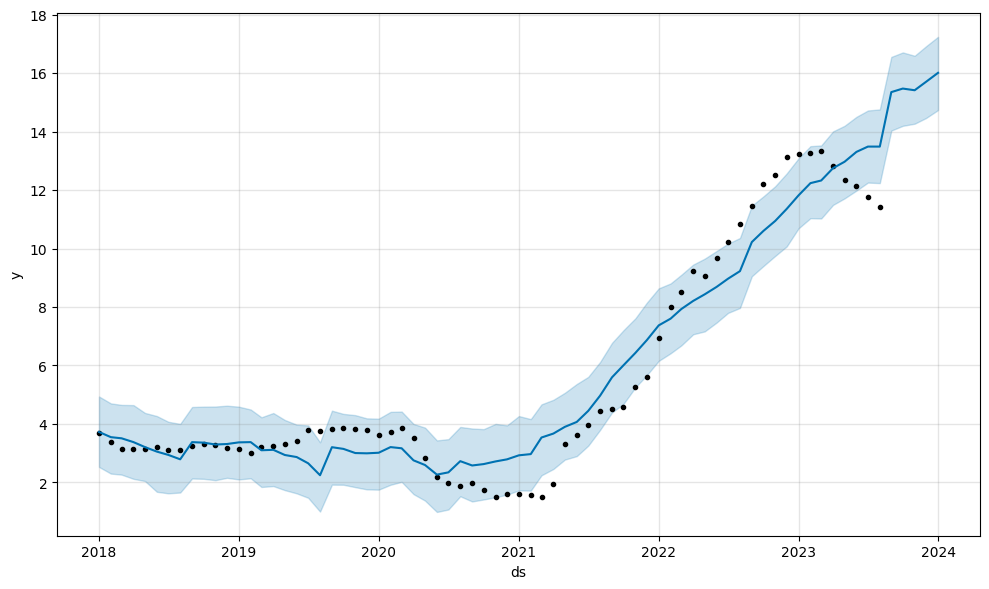

In [12]:
fig1=m.plot(forecast)